<div style="text-align: center; background-color: black; padding: 20px;">
    <h1 style="color:Yellow; font-family: 'Arial', sans-serif;">Taxi Fare Data Project</h1>
</div>



In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import matplotlib
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [160]:
df = pd.read_csv("TaxiFare.csv")

In [161]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [162]:
df.drop("unique_id", axis =1, inplace= True)

In [163]:
df.describe() 
# from the tabel it can be concluded that there are extreame outliers in latitude and longitude coulumns.
# The longitude of pickup is varying from -72 to -75. Latitude pickup is mmostly around 40 t 41.
# Minimum value in amount column is in negative that should be treated before creating a model.
# minimum numbers of passenger is 0 that can create problem.
# Maximum value in Latitude of mpickup is a outlier that should be removed.
# MAximum value in longitude drop off is also an otlier.
# Minimum value of drop off latitude is also a outlier.

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [164]:
df.isnull().sum() # there is no null values in the dataset.

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [165]:
df = df[df['amount'] >= 3]                   # Minimum fare charge is $3.00 .
df = df[df['no_of_passenger'] >= 1]          # Taxi charges only when there's at least one passenger.
df = df[(df['longitude_of_pickup'] <= -72) & (df['longitude_of_pickup'] >= -75)]
df = df[(df['latitude_of_pickup'] <= 42) & (df['latitude_of_pickup'] >= 40)]
df = df[(df['longitude_of_dropoff'] <= -72) & (df['longitude_of_dropoff'] >= -75)]
df = df[(df['latitude_of_dropoff'] <= 42) & (df['latitude_of_dropoff'] >= 40)]

In [166]:
df.shape

(48499, 7)

In [167]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,48499.000000,48499.000000,48499.000000,48499.000000,48499.000000,48499.000000
mean,11.417589,-73.975237,40.751133,-73.974074,40.751599,1.676612
std,9.666085,0.039383,0.030697,0.038446,0.033566,1.290307
min,3.000000,-74.711648,40.121653,-74.755480,40.164927,1.000000
25%,6.100000,-73.992313,40.736525,-73.991332,40.735914,1.000000
50%,8.500000,-73.982130,40.753445,-73.980498,40.754116,1.000000
75%,12.500000,-73.968430,40.767782,-73.965397,40.768482,2.000000
max,200.000000,-72.856968,41.650000,-72.854940,41.543217,6.000000


Text(0.5, 0, 'Count')

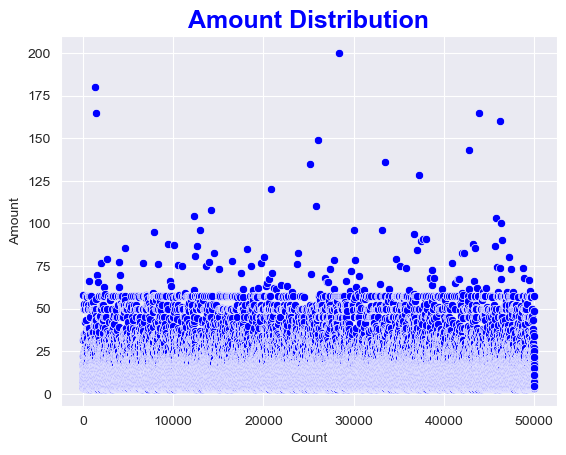

In [168]:
sns.scatterplot( df.amount, color = 'b')
sns.set_style("dark")
plt.title("Amount Distribution", fontsize = 18, color = 'b', weight = 'bold')
plt.grid()
plt.ylabel("Amount")
plt.xlabel("Count")

In [169]:
# It can be interpreted that the amount is mostly upto $60 and the rest are outliers.

In [170]:
df = df[df.amount < 50]

In [171]:
df.shape

(47859, 7)

In [172]:
df.amount.describe()

count    47859.000000
mean        10.764767
std          7.691925
min          3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max         49.830000
Name: amount, dtype: float64

In [173]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])
df["hour"] = df.date_time_of_pickup.dt.hour
df["month"] = df.date_time_of_pickup.dt.month
df["weekday"] = df.date_time_of_pickup.dt.weekday

In [174]:
df.drop("date_time_of_pickup", axis =1, inplace =True)

In [175]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,month,weekday
count,47859.000000,47859.000000,47859.000000,47859.000000,47859.000000,47859.000000,47859.000000,47859.000000,47859.000000
mean,10.764767,-73.976333,40.751637,-73.974607,40.752082,1.675422,13.498569,6.270398,3.033432
std,7.691925,0.036212,0.029441,0.035052,0.032339,1.289364,6.509932,3.460112,1.955716
min,3.000000,-74.711648,40.121653,-74.755480,40.164927,1.000000,0.000000,1.000000,0.000000
25%,6.000000,-73.992374,40.736848,-73.991308,40.736390,1.000000,9.000000,3.000000,1.000000
50%,8.500000,-73.982188,40.753593,-73.980537,40.754295,1.000000,14.000000,6.000000,3.000000
75%,12.500000,-73.968761,40.767860,-73.965722,40.768600,2.000000,19.000000,9.000000,5.000000
max,49.830000,-72.856968,41.650000,-72.854940,41.543217,6.000000,23.000000,12.000000,6.000000


In [176]:
# to calclate distance we use  Haversine formula.
# creating a function that will take co-ordinated as data and will return the distance travelled. 

In [177]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers    
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))    
    distance = R * c
    return distance

In [178]:
df["distance_km"] = haversine_distance(df.latitude_of_pickup ,df.longitude_of_pickup, df.latitude_of_dropoff, df.longitude_of_dropoff)
df.distance_km.describe() 
# we have minimum distance 0 that means the person must have not took taxi or traveeled and came back to same place. 

count    47859.000000
mean         3.182980
std          3.446575
min          0.000000
25%          1.269002
50%          2.148010
75%          3.846838
max        101.094619
Name: distance_km, dtype: float64

In [179]:
df[df.distance_km==0].shape # there are 471 rows that have same pickup and dropoff co ordinates. 
# Because of which distance travelled is zero and it makes no sense.

(462, 10)

In [180]:
df= df[df.distance_km > 0.1]
df.distance_km.describe()

count    47234.000000
mean         3.224976
std          3.449783
min          0.100688
25%          1.298249
50%          2.177812
75%          3.888244
max        101.094619
Name: distance_km, dtype: float64

## Model Building

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [182]:
lr = LinearRegression()

In [183]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,month,weekday,distance_km
count,47234.000000,47234.000000,47234.000000,47234.000000,47234.000000,47234.000000,47234.000000,47234.000000,47234.000000,47234.000000
mean,10.754852,-73.976625,40.751611,-73.974876,40.752062,1.676504,13.496973,6.272939,3.034086,3.224976
std,7.627411,0.033654,0.027812,0.032401,0.030902,1.290743,6.512118,3.460620,1.955268,3.449783
min,3.000000,-74.711648,40.121653,-74.755480,40.164927,1.000000,0.000000,1.000000,0.000000,0.100688
25%,6.000000,-73.992385,40.736906,-73.991308,40.736441,1.000000,9.000000,3.000000,1.000000,1.298249
50%,8.500000,-73.982210,40.753611,-73.980560,40.754333,1.000000,14.000000,6.000000,3.000000,2.177812
75%,12.500000,-73.968910,40.767872,-73.965835,40.768619,2.000000,19.000000,9.000000,5.000000,3.888244
max,49.830000,-72.856968,41.650000,-72.854940,41.543217,6.000000,23.000000,12.000000,6.000000,101.094619


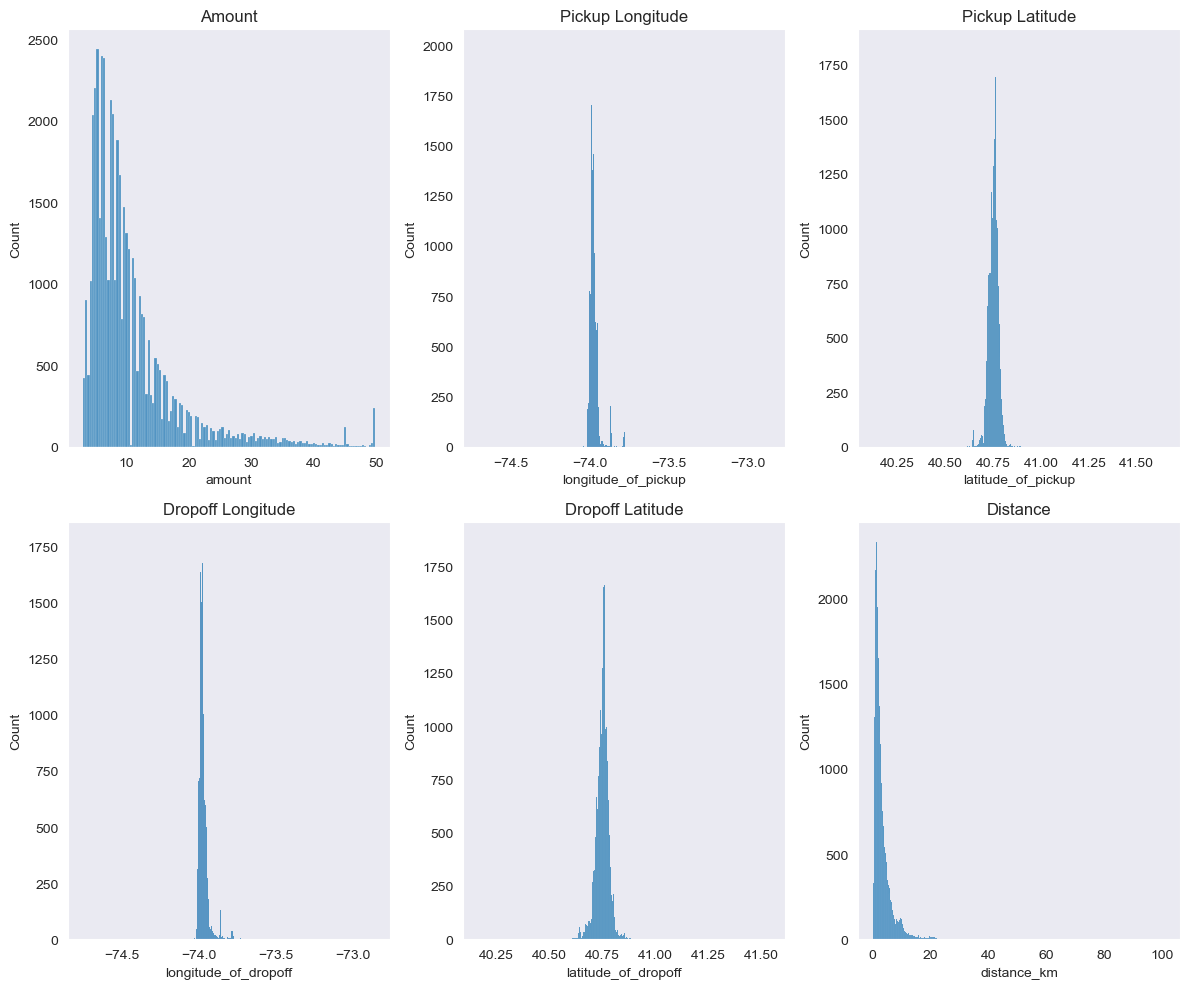

In [184]:
plt.figure(figsize=(12, 10)) 

plt.subplot(2, 3, 1)  
sns.histplot(df['amount'])
plt.title("Amount")

plt.subplot(2, 3, 2)  
sns.histplot(df['longitude_of_pickup'])
plt.title("Pickup Longitude")

plt.subplot(2, 3, 3)  
sns.histplot(df['latitude_of_pickup'])
plt.title("Pickup Latitude")

plt.subplot(2, 3, 4)  
sns.histplot(df['longitude_of_dropoff'])
plt.title("Dropoff Longitude")

plt.subplot(2, 3, 5)  
sns.histplot(df['latitude_of_dropoff'])
plt.title("Dropoff Latitude")

plt.subplot(2, 3, 6)  
sns.histplot(df['distance_km'])
plt.title("Distance")

plt.tight_layout() 

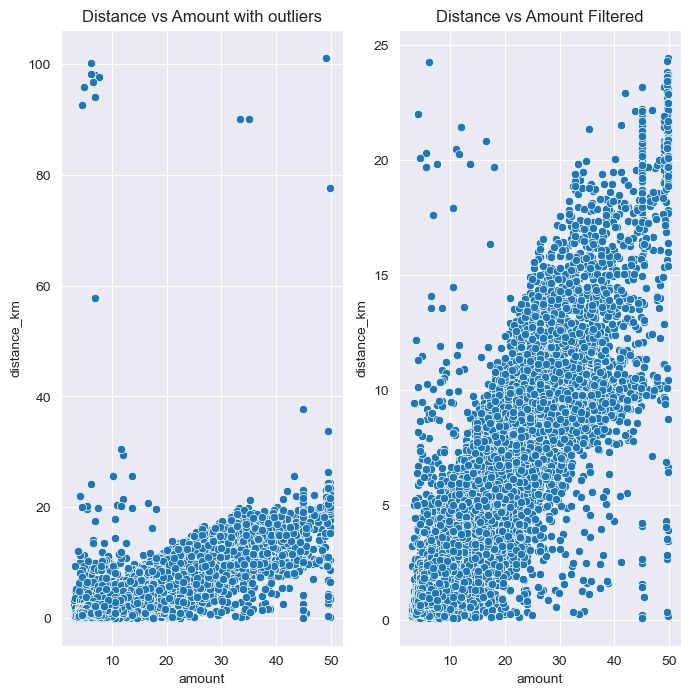

In [185]:
plt.figure(figsize = (8, 8))


plt.subplot(1,2,1)
sns.scatterplot(x = df.amount, y = df.distance_km) # there are definately some outliers in distance that needed to fixed.
plt.title("Distance vs Amount with outliers")
plt.grid()

df = df[df["distance_km"]<= 25]
plt.subplot(1,2,2)
sns.scatterplot(x = df.amount, y =df.distance_km) 
plt.title("Distance vs Amount Filtered")

plt.grid()

In [186]:
x = df.drop("amount", axis =1)
y = df.amount

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.3, random_state=42)

In [188]:
lr.fit(x_train, y_train)
lr.score(x_train, y_train)

0.8052795452781256

In [189]:
lr.score(x_test, y_test)

0.8053764662299256

# Trial and error

## KNN

In [190]:
from sklearn.neighbors import KNeighborsRegressor

In [191]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [192]:
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

In [193]:
knn_model.score(x_train, y_train)

0.8557544617842654

In [194]:
knn_model.score(x_test, y_test)

0.7866004248650884

## Decision Tree

In [195]:
from sklearn.tree import DecisionTreeRegressor

In [196]:
tree_model = DecisionTreeRegressor(max_depth = 7)

In [197]:
tree_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [198]:
tree_model.score(x_train, y_train)

0.8450530588494467

In [199]:
tree_model.score(x_test, y_test)

0.8210896225530206

## Random Forest

In [128]:
from sklearn.svm import SVR

In [129]:
svr = SVR(kernel = 'linear',)

In [130]:
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [131]:
svr.score(x_train, y_train)

0.7987687595584565

In [132]:
svr.score(x_test, y_test)

0.7981981867056127

In [133]:
# can try after removing latitude and longitude . Can increase amount of Fare data. Can Increase distance data.

# After removing some not needed columns

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,month,weekday,distance_km
amount,1.000000,0.377928,-0.146601,0.368542,-0.118519,0.013816,-0.023746,0.023349,0.005706,0.895004
longitude_of_pickup,0.377928,1.000000,0.114635,0.355959,0.070549,0.005947,0.019876,0.000935,-0.029218,0.378562
latitude_of_pickup,-0.146601,0.114635,1.000000,0.087266,0.471694,-0.000551,0.037307,-0.001382,-0.052294,-0.178759
longitude_of_dropoff,0.368542,0.355959,0.087266,1.000000,0.229141,-0.003122,-0.054470,-0.002593,-0.003154,0.401452
latitude_of_dropoff,-0.118519,0.070549,0.471694,0.229141,1.000000,-0.003430,0.016180,0.002567,-0.028885,-0.098174
no_of_passenger,0.013816,0.005947,-0.000551,-0.003122,-0.003430,1.000000,0.010604,0.006082,0.038701,0.009433
hour,-0.023746,0.019876,0.037307,-0.054470,0.016180,0.010604,1.000000,-0.000141,-0.091096,-0.039267
month,0.023349,0.000935,-0.001382,-0.002593,0.002567,0.006082,-0.000141,1.000000,-0.011536,0.005786
weekday,0.005706,-0.029218,-0.052294,-0.003154,-0.028885,0.038701,-0.091096,-0.011536,1.000000,0.019766
distance_km,0.895004,0.378562,-0.178759,0.401452,-0.098174,0.009433,-0.039267,0.005786,0.019766,1.000000


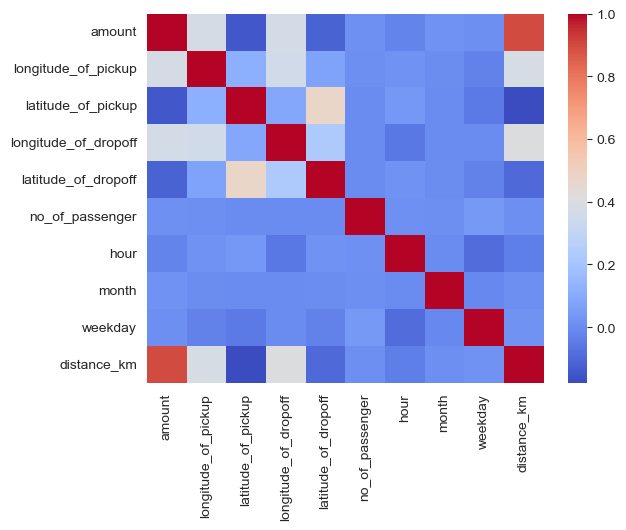

In [200]:
cor = df.corr()
sns.heatmap(cor,cmap = 'coolwarm')
cor

In [201]:
x = df.drop(['amount','month', 'weekday', 'no_of_passenger', ], axis =1)
y = df.amount

In [202]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.3, random_state=42)

In [203]:
lr.fit(x_train, y_train)
lr.score(x_train, y_train)


0.8049002214978448

In [204]:
lr.score(x_test, y_test)

0.8047673958973285

In [205]:
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

In [206]:
knn_model.score(x_train, y_train)

0.860697987934998

In [207]:
knn_model.score(x_test, y_test)

0.7931891868103166

In [208]:
tree_model.fit(x_train, y_train)
tree_model.score(x_train, y_train)

0.8448269492481881

In [209]:
tree_model.score(x_test, y_test)

0.8225386411853706

## Gradient boosting

In [210]:
from sklearn.ensemble import AdaBoostRegressor

In [211]:
booster = AdaBoostRegressor(n_estimators= 120, random_state=0, base_estimator= lr, learning_rate = 1.5 )

In [212]:
booster.fit(x_train, y_train)
booster.score(x_train, y_train)

0.8048700734129148

In [213]:
booster.score(x_test, y_test)

0.8048614022032544

In [214]:
from sklearn.ensemble import BaggingRegressor

In [215]:
bagg = BaggingRegressor(n_estimators = 120, max_samples= 0.2, )

In [216]:
bagg.fit(x_train, y_train)

BaggingRegressor(max_samples=0.2, n_estimators=120)

In [217]:
bagg.score(x_train, y_train)

0.8956638073933532

In [218]:
bagg.score(x_test, y_test)

0.8449579070815858

## Bagging 

In [219]:
x_samples  = x_test.head(5)
true_val = y_test.head() 
predictions = bagg.predict(x_samples)
result  = pd.DataFrame([predictions, true_val], index = ["Predicted Values", "True Values"], columns = ['Obs 1','Obs 2', 'Obs 3', 'Obs 4','Obs 5'])
result

,Obs 1,Obs 2,Obs 3,Obs 4,Obs 5
Predicted Values,17.48975,9.038333,5.3125,8.821667,10.331083
True Values,19.50000,8.000000,6.0000,9.300000,10.500000


## KNN model

In [220]:
x_samples  = x_test.head(5)
true_val = y_test.head() 
predictions = knn_model.predict(x_samples)
result  = pd.DataFrame([predictions, true_val], index = ["Predicted Values", "True Values"], columns = ['Obs 1','Obs 2', 'Obs 3', 'Obs 4','Obs 5'])
result

,Obs 1,Obs 2,Obs 3,Obs 4,Obs 5
Predicted Values,11.3,8.74,5.94,8.22,10.16
True Values,19.5,8.00,6.00,9.30,10.50


## Decision Tree

In [221]:
x_samples  = x_test.head(5)
true_val = y_test.head() 
predictions = tree_model.predict(x_samples)
result  = pd.DataFrame([predictions, true_val], index = ["Predicted Values", "True Values"], columns = ['Obs 1','Obs 2', 'Obs 3', 'Obs 4','Obs 5'])
result

,Obs 1,Obs 2,Obs 3,Obs 4,Obs 5
Predicted Values,14.924451,9.906402,5.121472,8.537536,10.402864
True Values,19.500000,8.000000,6.000000,9.300000,10.500000


## Linear Regresor

In [222]:
x_samples  = x_test.head(5)
true_val = y_test.head() 
predictions = lr.predict(x_samples)
result  = pd.DataFrame([predictions, true_val], index = ["Predicted Values", "True Values"], columns = ['Obs 1','Obs 2', 'Obs 3', 'Obs 4','Obs 5'])
result

,Obs 1,Obs 2,Obs 3,Obs 4,Obs 5
Predicted Values,14.718668,9.876539,5.943821,8.333207,11.710371
True Values,19.500000,8.000000,6.000000,9.300000,10.500000


<div style="text-align: center; background-color: black; padding: 20px;">
    <h1 style="color:Yellow; font-family: 'Arial', sans-serif;">THANK YOU</h1>
</div>

